<a href="https://colab.research.google.com/github/HammadN98/inadimplencia_em_cartoes_de_credito/blob/main/inadimplecia_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Importacoes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("deep")
import numpy as np

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/HammadN98/inadimplencia_em_cartoes_de_credito/refs/heads/main/dados/train.csv")


## 1. Compreensao do Negocio

Obejetivo do negocio: Prever a inadimplencia de clientes com bases em seus dados financeiros contidos no banco.

Assim podemos **Gerenciar riscos** e **Otimizar concessoes**.

O projetgo obtem sucesso com:

* Reducao da porcentagem de inadimplencia.
* Aumentando a precisao da analise de risco, identificando inadimplentes antes de aprovar qualquer valor financeiro.
* Retorno finaceiro positivo devido a diminuicao dos "Calotes".

Perguntas a serem respondidas:

* QUal a representatividade dos inadimplentes?
* Existe um perfil tipico de idadimplentes?
* Existe um limite seguro para diferentes tipos de clientes?
* Clientes que atrasam, compensam nos meses seguintes?
* OS atrasos tem padroes?
* Quais os fatores mais influenciam nos pagamentos?

## 2. Compreensao dos Dados

#### Estrurtura dos dados

Id -> Identificador de cada cliente.

LIMIT_BAL -> Valor de credito concedido, inclui valores idividuais e familiar.

SEX -> Genero:
  * 1 = Masc.
  * 2 = Fem.

EDUCATION -> Nivel de escolaridade:
  * 1 = pós-graduação.
  * 2 = universidade.
  * 3 = ensino médio.
  * 4 = outros.
  * 5, 6 = desconhecido.

MARRIAGE -> Estado civil:
  * 1 = pós-graduação.
  * 2 = universidade.
  * 3 = ensino médio.
  * 4 = outros.
  * 5, 6 = desconhecido.

AGE -> Idade do cliente.

PAY_0 -> Status de pagamento, em setembro de 2005:
  * -1 = pagamento em dia.
  * 1 = atraso de 1 mês.
  * 2 = atraso de 2 meses.
  * 9 = atraso de 9 meses ou mais.
  
PAY_2 a PAY_6 -> Status de pagamento (Abril a Agosto):
  * Mesma escala que acima.

BILL_AMT1 a BILL_AMT6 -> Montante da fatura.
  * Dos meses de abril a setembro.

PAY_AMT1 a PAY_AMT6 -> Valor do pagamento anterior
  * Dos meses de abril a setembro.

default_payment_next_month (Variavel alvo) -> Inadimplencia no proximo mes:
  * 1 = sim.
  * 0 = não.



In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

In [4]:
dados.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.00000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14949.183667,167214.746667,1.607571,1.854190,1.551714,35.461619,-0.01119,-0.127238,-0.164857,-0.21819,...,43387.372476,40398.551095,38931.194000,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762,0.221190
std,8632.775153,128965.188482,0.488303,0.791628,0.521176,9.206628,1.12321,1.198957,1.198624,1.17221,...,64081.073110,60396.811177,59196.499234,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697,0.415058
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.00000,-2.000000,-2.000000,-2.00000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7508.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.00000,-1.000000,-1.000000,-1.00000,...,2332.000000,1759.000000,1242.750000,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000,0.000000
50%,14939.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.00000,0.000000,0.000000,0.00000,...,19158.500000,18266.500000,17203.500000,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22386.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.00000,0.000000,0.000000,0.00000,...,55376.750000,50517.250000,49463.000000,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000,0.000000
max,29998.000000,800000.000000,2.000000,6.000000,3.000000,75.000000,8.00000,8.000000,8.000000,8.00000,...,706864.000000,587067.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000,1.000000


## 3. Analise Exploratoria

### 3.1 Variavel alvo

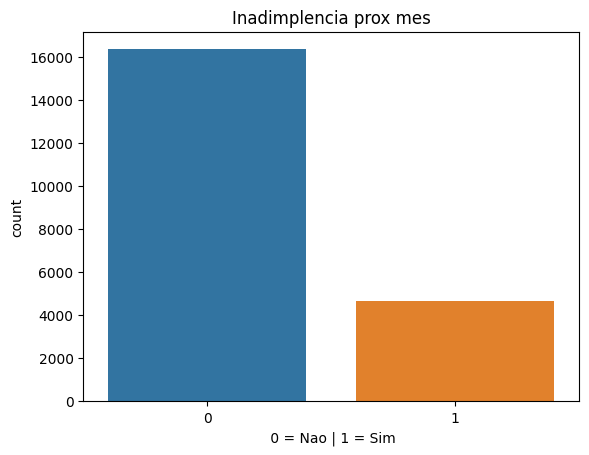

In [5]:
sns.countplot(data=dados, x="default_payment_next_month" , hue="default_payment_next_month", legend=False)
plt.title("Inadimplencia prox mes")
plt.xlabel(' 0 = Nao | 1 = Sim');

Classes desbalanceadas. Sera necessario balarcear-las para evitar enviesamento.

#### 3.2 Variaveis Pessoais do clientes

* SEX     
* EDUCATION
* MARRIAGE  
* AGE  

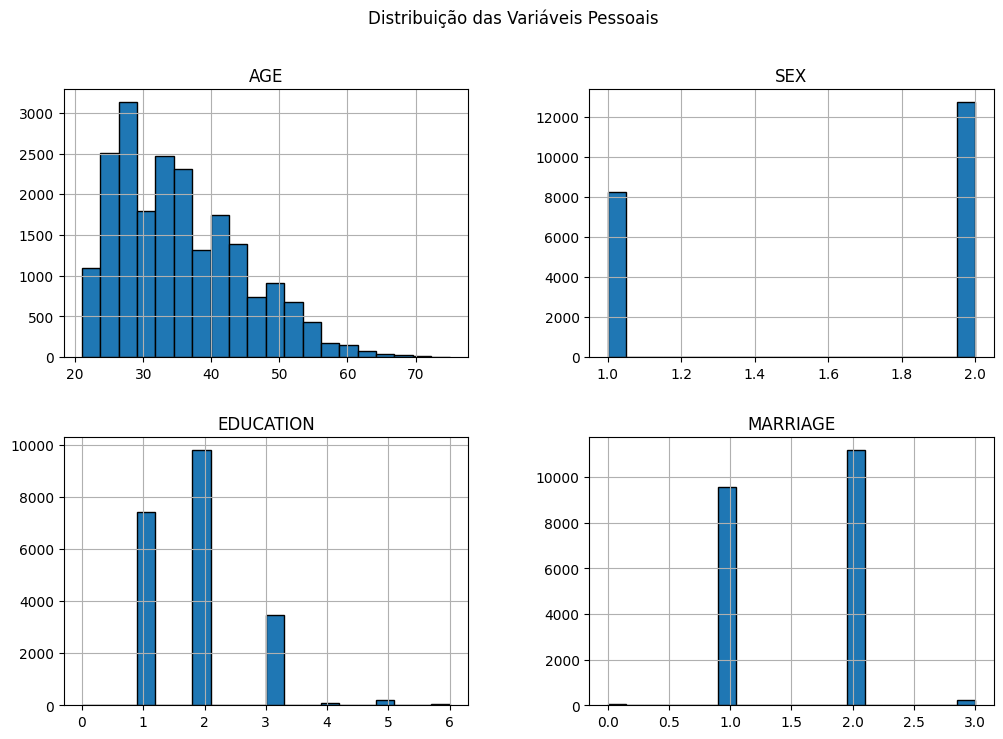

In [6]:
pessoais = ['AGE','SEX', 'EDUCATION', 'MARRIAGE']
dados[pessoais].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribuição das Variáveis Pessoais")
plt.show()

In [7]:
print(f"AGE -> Min: {dados['AGE'].min()} Media: {dados['AGE'].mean()} Max: {dados['AGE'].max()}")
print(f"SEX -> Min: {dados['SEX'].min()} Mediana: {dados['SEX'].median()} Max: {dados['SEX'].max()}")
print(f"EDUCATION -> Min: {dados['EDUCATION'].min()} Mediana: {dados['EDUCATION'].median()} Max: {dados['EDUCATION'].max()}")
print(f"MARRIAGE -> Min: {dados['MARRIAGE'].min()} Mediana: {dados['MARRIAGE'].median()} Max: {dados['MARRIAGE'].max()}")

AGE -> Min: 21 Media: 35.461619047619045 Max: 75
SEX -> Min: 1 Mediana: 2.0 Max: 2
EDUCATION -> Min: 0 Mediana: 2.0 Max: 6
MARRIAGE -> Min: 0 Mediana: 2.0 Max: 3


1. AGE: Pico em torno dos 30 anos, e a maioria dos clientes estao entre 30 a 40 anos.
2. SEX: Maioria dos clientes e do sexo feminino.
3. EDUCATION: A maior parte possui nivel Universitario; seguido por pos-graduacao; E ainda um pequena porcao de ensino medio.
4. MARRIAGE: A maior porcao e solteira, com casados logo apos e poquissimos divorciados.


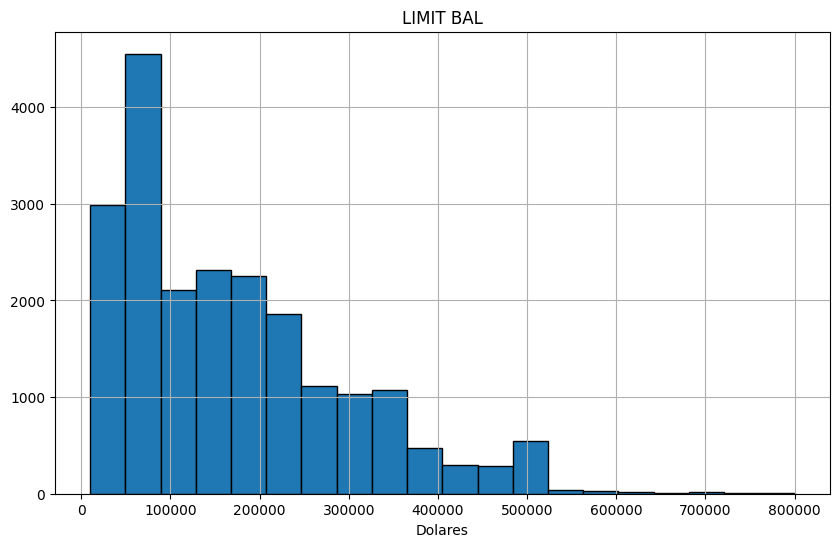

In [8]:
dados['LIMIT_BAL'].hist(figsize=(10, 6), bins=20, edgecolor='black')
plt.title("LIMIT BAL")
plt.xlabel('Dolares');

In [9]:
print(f"LIMIT BAL -> Min: {dados['LIMIT_BAL'].min()} Media: {dados['LIMIT_BAL'].mean()} Max: {dados['LIMIT_BAL'].max()}")

LIMIT BAL -> Min: 10000 Media: 167214.74666666667 Max: 800000


In [10]:
dados['LIMIT_BAL'].median()

140000.0

LIMIT BAL:A maioria dos clientes possui credito baixo sendo 50% dos cientes com - de 150000 dol, uma asimetrica positiva, concentrada entre 0 a 200000 dol. Sendo o maior na casa do 800000 dol.

Proximos passos:
* Verificar correlacao com a variavel algo.
* Analisar outliers.

#### 3.3 Variaveis Monetarias

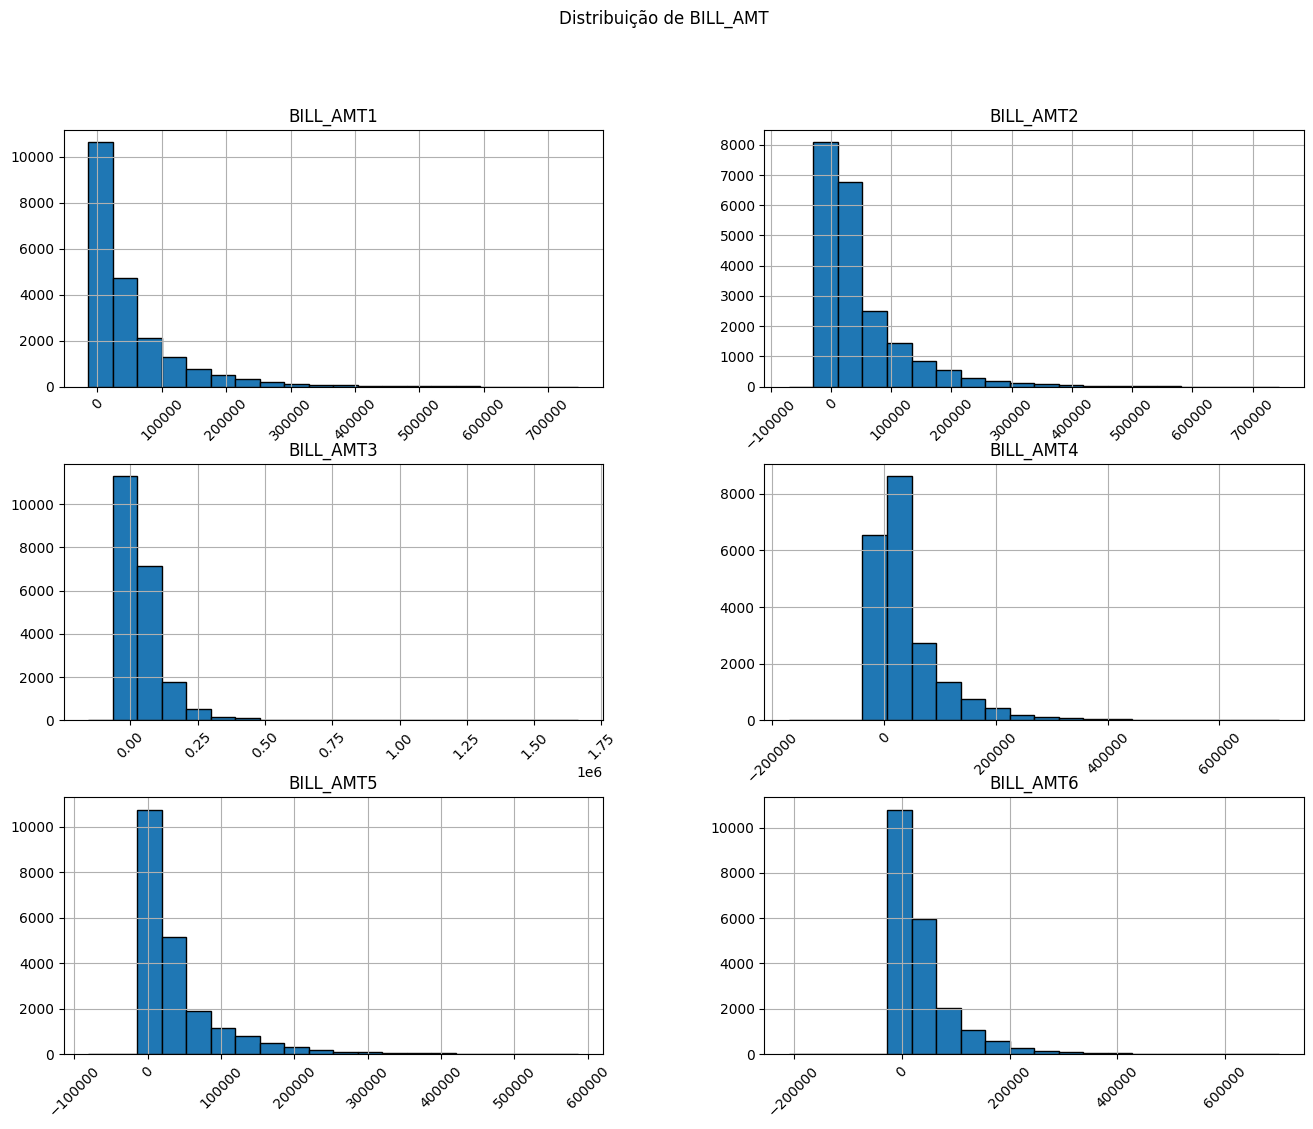

In [11]:
bill = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',]
dados[bill].hist(figsize=(16, 12), bins=20, edgecolor='black',xrot=45)
plt.suptitle("Distribuição de BILL_AMT")
plt.show()

In [12]:
for b in bill:
  print(f"{b}-> Min: {dados[b].min()} Media: {dados[b].mean()} Max: {dados[b].max()}")

BILL_AMT1-> Min: -14386 Media: 51501.54238095238 Max: 746814
BILL_AMT2-> Min: -69777 Media: 49463.50266666667 Max: 743970
BILL_AMT3-> Min: -157264 Media: 47232.57776190476 Max: 1664089
BILL_AMT4-> Min: -170000 Media: 43387.372476190474 Max: 706864
BILL_AMT5-> Min: -81334 Media: 40398.551095238094 Max: 587067
BILL_AMT6-> Min: -209051 Media: 38931.194 Max: 699944


A distribuicoes sao bem semelhantes, com o pico em torno de 0 e cauda a direita.

Proximos passos:
* Examinar os valores extrremamente altos.
* Possivel de transformacao log
* Varificar tendencias temporais.

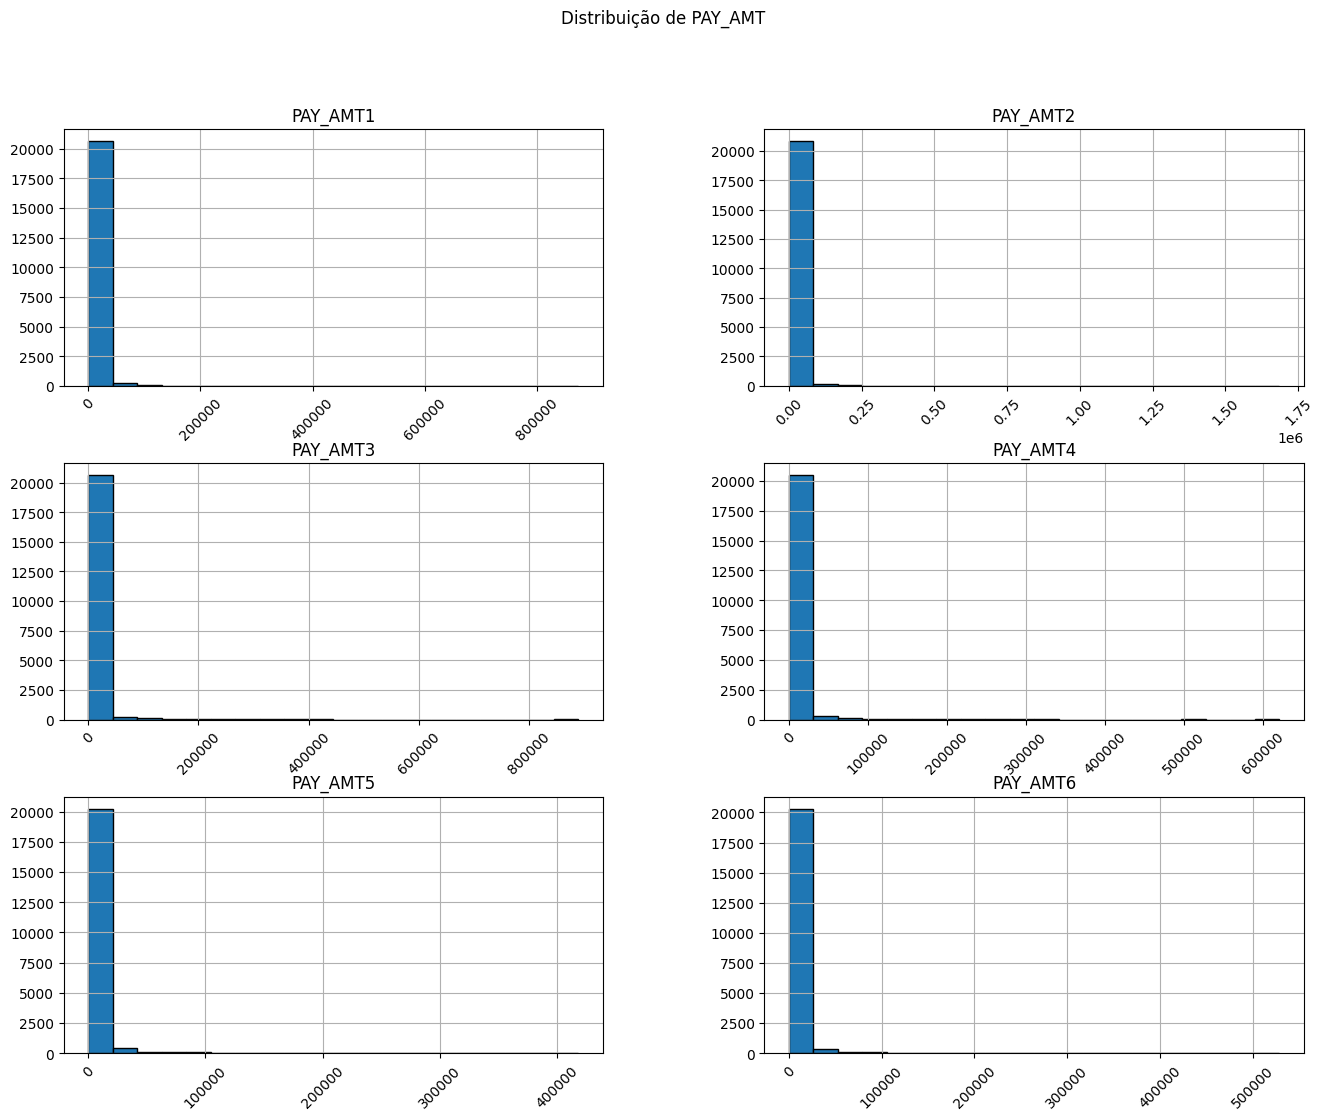

In [13]:
pay_amt = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', ]
dados[pay_amt].hist(figsize=(16, 12), bins=20, edgecolor='black', xrot=45)
plt.suptitle("Distribuição de PAY_AMT")
plt.show()

In [14]:
for p in pay_amt:
  print(f"{p}-> Min: {dados[p].min()} Media: {dados[p].mean()} Max: {dados[p].max()}")

PAY_AMT1-> Min: 0 Media: 5686.349333333334 Max: 873552
PAY_AMT2-> Min: 0 Media: 5923.003476190476 Max: 1684259
PAY_AMT3-> Min: 0 Media: 5202.325333333333 Max: 889043
PAY_AMT4-> Min: 0 Media: 4793.172 Max: 621000
PAY_AMT5-> Min: 0 Media: 4797.012952380953 Max: 417990
PAY_AMT6-> Min: 0 Media: 5211.736761904762 Max: 528666


Assimetrica, com quandes quantidades em 0.
Prossimos passos:
* Investugar os valores de pagamentos extremamente altos
* E possivel agrupar as varivaies para capturar o comportamento do cliente.
* Possivel de tranformacao log

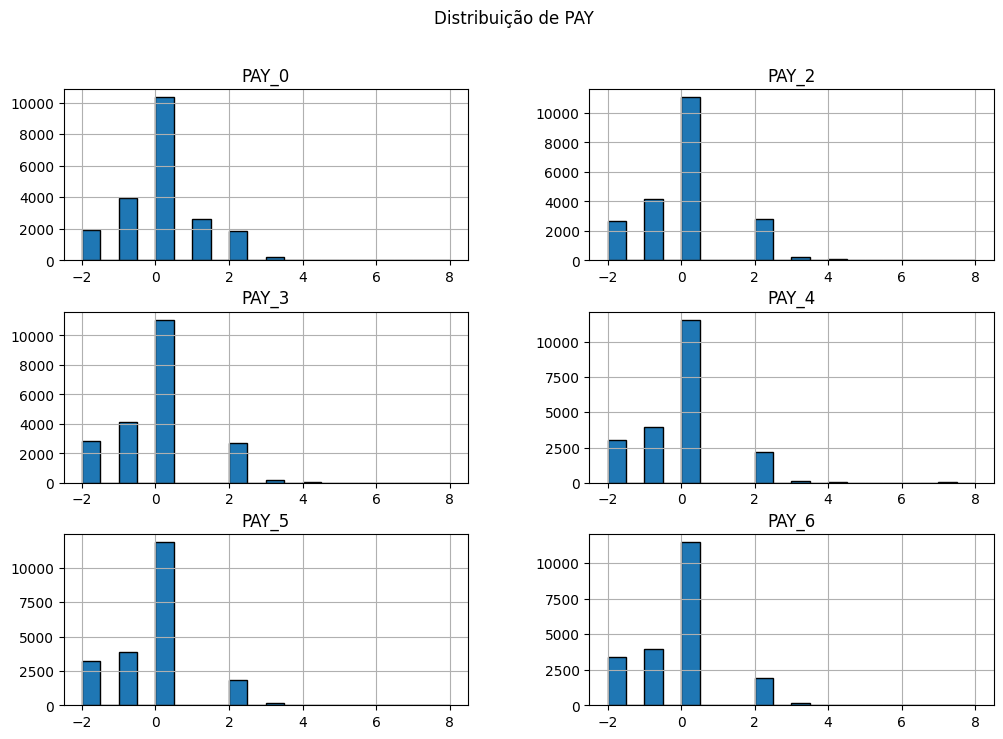

In [15]:
pay = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
dados[pay].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribuição de PAY")
plt.show()

In [16]:
for p in pay:
  print(f"{p}-> Min: {dados[p].min()} Media: {dados[p].mean()} Max: {dados[p].max()}")

PAY_0-> Min: -2 Media: -0.01119047619047619 Max: 8
PAY_2-> Min: -2 Media: -0.12723809523809523 Max: 8
PAY_3-> Min: -2 Media: -0.16485714285714287 Max: 8
PAY_4-> Min: -2 Media: -0.21819047619047618 Max: 8
PAY_5-> Min: -2 Media: -0.26095238095238094 Max: 8
PAY_6-> Min: -2 Media: -0.2886666666666667 Max: 8


Os valores estao concentrados em pagamento adiantado ou em dia. E alguma coisa extremamente atrasada.
Proximos passos:
* Possibilidade de agrupamento
* Relacionar com a variavel alvo para identicifar a relevancial de alguns
* Analisar o comportamento temporal para identificar mudanca de padrao.

## 4. Procurando outliers

### 4.1 AGE


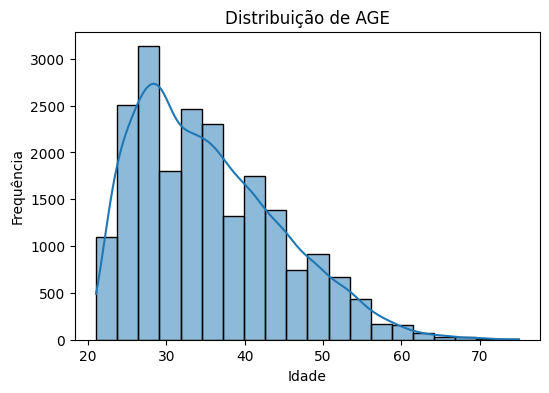

In [17]:
plt.figure(figsize=(6, 4))
sns.histplot(dados['AGE'], kde=True, bins=20)
plt.title('Distribuição de AGE')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

Como a variavel nao possui valores extremos e/ou isolados, pode se afirmar que nao possuem outliers.

### 4.3 SEX

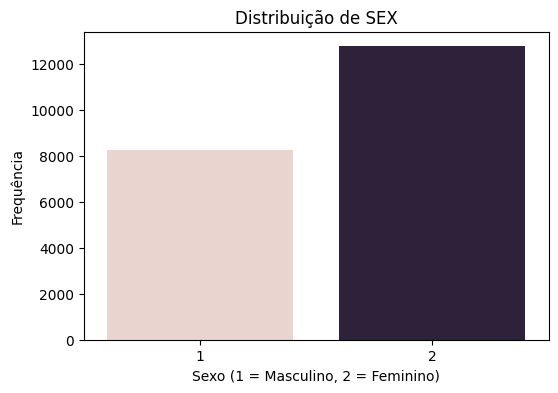

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dados, x='SEX', hue="SEX", legend=False)
plt.title('Distribuição de SEX')
plt.xlabel('Sexo (1 = Masculino, 2 = Feminino)')
plt.ylabel('Frequência')
plt.show()

Prevalencia fminina mas nenhum valor atipico

### 4.4 EDUCATION

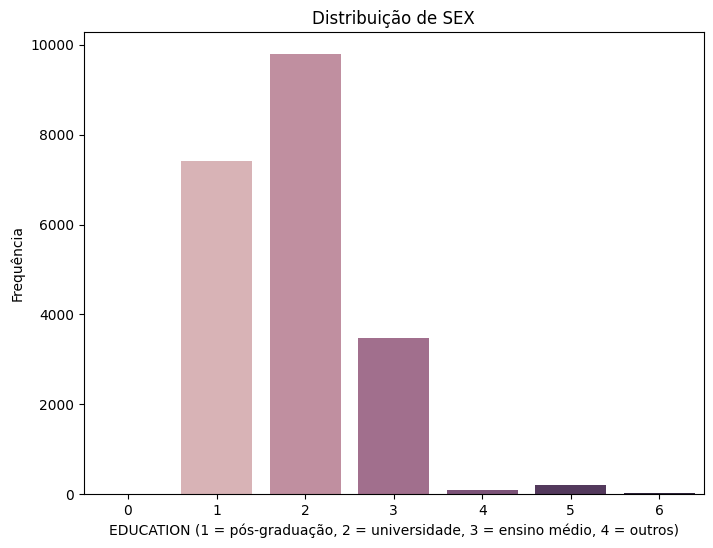

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dados, x='EDUCATION', hue="EDUCATION", legend=False)
plt.title('Distribuição de SEX')
plt.xlabel('EDUCATION (1 = pós-graduação, 2 = universidade, 3 = ensino médio, 4 = outros)')
plt.ylabel('Frequência')
plt.show()

1 = pós-graduação.

2 = universidade.

3 = ensino médio.

4 = outros.

0, 5, 6 = desconhecido.

COnsiderando que apenas do 1 ao 4 os valores sao condizentes, os valores 0, 5, 6. **Serao convertidos para 4, outros**.



In [20]:
dados['EDUCATION'] = dados['EDUCATION'].replace({0:4, 5:4, 6:4})
dados['EDUCATION'].unique()

array([2, 1, 3, 4])

### 4.5 MARRIAGE

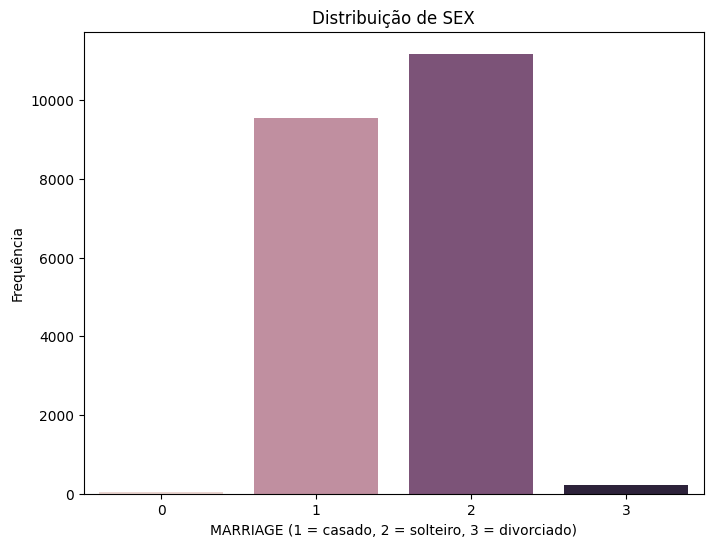

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dados, x='MARRIAGE', hue="MARRIAGE", legend=False)
plt.title('Distribuição de SEX')
plt.xlabel('MARRIAGE (1 = casado, 2 = solteiro, 3 = divorciado)')
plt.ylabel('Frequência')
plt.show()

In [22]:
dados['MARRIAGE'].value_counts()

,count
MARRIAGE,
2,11184
1,9561
3,219
0,36


O valor 0 nao existe no dicionario e pode ser considerado um falta de informacao considerando que sao apenas 36 registros, eles serao tyranformado para a categoria de maior quantidade para reduzir o impacto no dataset.

In [23]:
dados['MARRIAGE'] = dados['MARRIAGE'].replace({0:2})
dados['MARRIAGE'].unique()

array([2, 1, 3])

### 4.6 LIMIT BAL

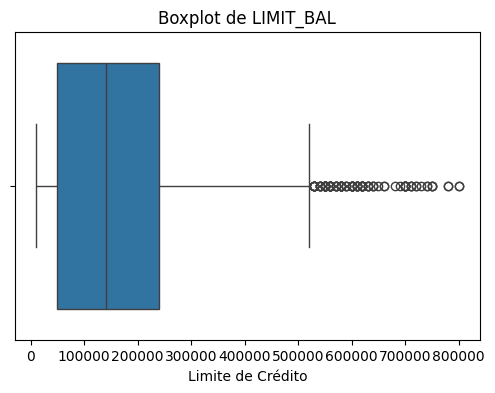

In [24]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=dados['LIMIT_BAL'])
plt.title('Boxplot de LIMIT_BAL')
plt.xlabel('Limite de Crédito')
plt.show()

In [25]:
(dados['LIMIT_BAL'] > 500000).sum()

136

#### 4.6.1 Capping de LIMIT BAL

A tecnica de capping sera usada para tratar os dados muito altos(possiveis outliers), que serao substituidos pelo limite superior do Q3 usando uma fator de 1.5.

Para, preservar a variablidade natural dos dados e evitar que os extremos distorcam e influenciem os modelos.

In [26]:
q1 = dados['LIMIT_BAL'].quantile(0.25)
q3 = dados['LIMIT_BAL'].quantile(0.75)

iqr = q3 - q1

lim_superior = q3 + 1.5 * iqr


dados['LIMIT_BAL_CAPPED'] = np.where(dados['LIMIT_BAL'] > lim_superior, lim_superior, dados['LIMIT_BAL'])

print("Quartil 3 (Q3):", q3)
print("Limite Superior:", lim_superior)

Quartil 3 (Q3): 240000.0
Limite Superior: 525000.0


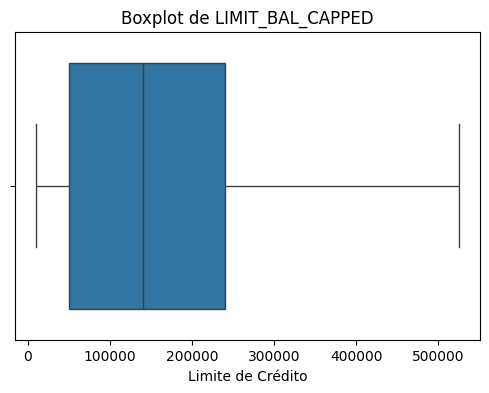

In [27]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=dados['LIMIT_BAL_CAPPED'])
plt.title('Boxplot de LIMIT_BAL_CAPPED')
plt.xlabel('Limite de Crédito')
plt.show()

### 4.7 Identificando a existencia de outliers em BILL_AMT

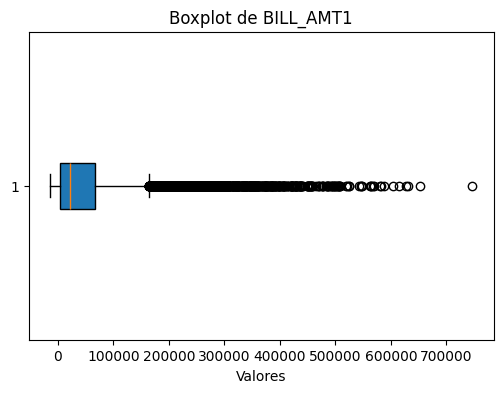

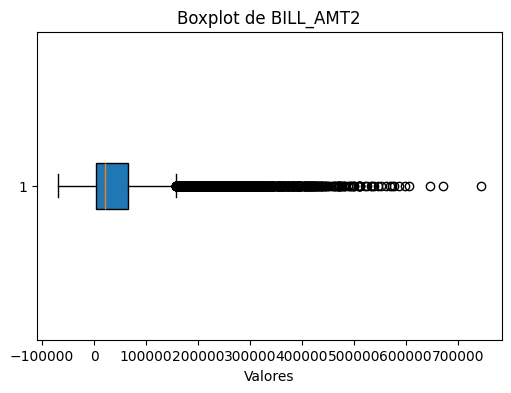

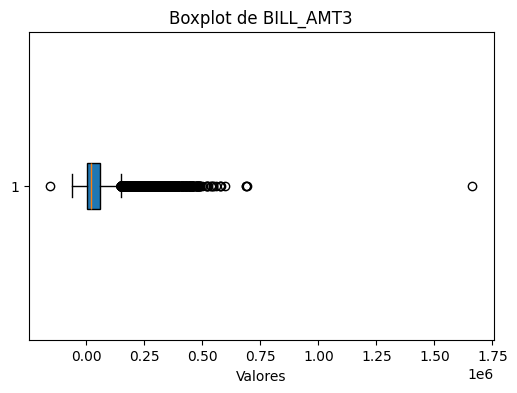

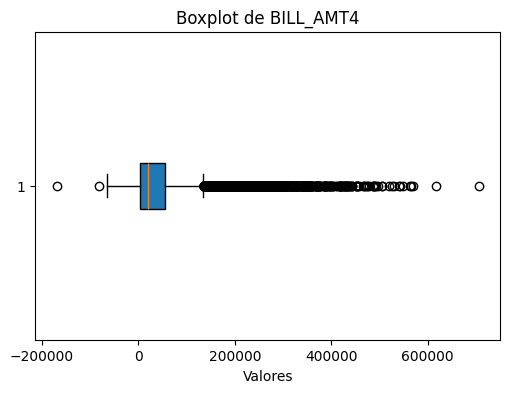

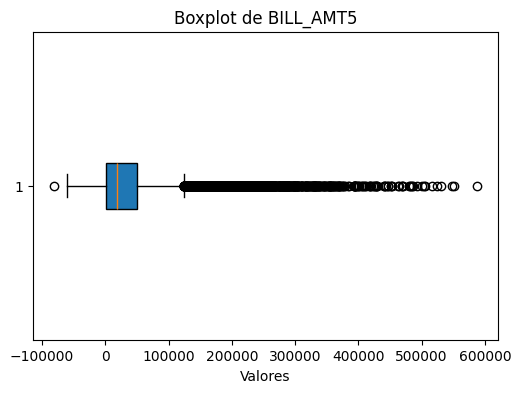

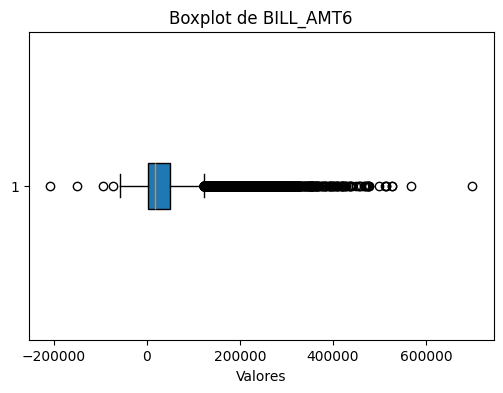

,Q1,Q3,IQR,Limite Inferior,Limite Superior,Qtd Outliers
BILL_AMT1,3564.75,67876.25,64311.50,-92902.500,164343.500,1663.0
BILL_AMT2,3000.00,64918.25,61918.25,-89877.375,157795.625,1655.0
BILL_AMT3,2686.25,60826.75,58140.50,-84524.500,148037.500,1696.0
BILL_AMT4,2332.00,55376.75,53044.75,-77235.125,134943.875,1789.0
BILL_AMT5,1759.00,50517.25,48758.25,-71378.375,123654.625,1906.0
BILL_AMT6,1242.75,49463.00,48220.25,-71087.625,121793.375,1879.0


In [28]:
# Função para calcular IQR e identificar limites
def verificar_outliers(df, colunas):
    resultados = {}
    for coluna in colunas:
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Identificando outliers
        outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
        resultados[coluna] = {
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Limite Inferior': limite_inferior,
            'Limite Superior': limite_superior,
            'Qtd Outliers': outliers.shape[0]
        }

        # Visualizacao
        plt.figure(figsize=(6, 4))
        plt.boxplot(df[coluna], vert=False, patch_artist=True)
        plt.title(f'Boxplot de {coluna}')
        plt.xlabel('Valores')
        plt.show()

    return resultados

resultados_bill_amt_outliers = verificar_outliers(dados, bill)

pd.DataFrame(resultados_bill_amt_outliers).T

Considerando que os outliers correspondem a um pouco menos que 10% dos dados eles serao tyratados tambem com capping.

In [29]:
limites_bill_amt = {
    'BILL_AMT1': {'lower': -92902.5, 'upper': 164343.5},
    'BILL_AMT2': {'lower': -89877.375, 'upper': 157795.625},
    'BILL_AMT3': {'lower': -84524.5, 'upper': 148037.5},
    'BILL_AMT4': {'lower': -77235.125, 'upper': 134943.875},
    'BILL_AMT5': {'lower': -71378.375, 'upper': 123654.625},
    'BILL_AMT6': {'lower': -71087.625, 'upper': 121793.375},
}

# Capping
for col in bill:
    lower_limit = limites_bill_amt[col]['lower']
    upper_limit = limites_bill_amt[col]['upper']
    # Substituindo valores acima do limite superior
    dados[col] = dados[col].apply(lambda x: upper_limit if x > upper_limit else x)
    # Substituindo valores abaixo do limite inferior
    dados[col] = dados[col].apply(lambda x: lower_limit if x < lower_limit else x)


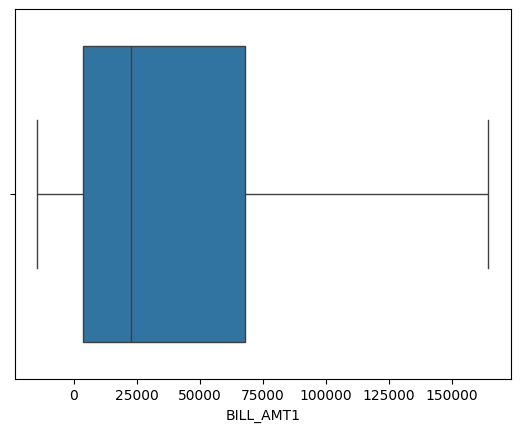

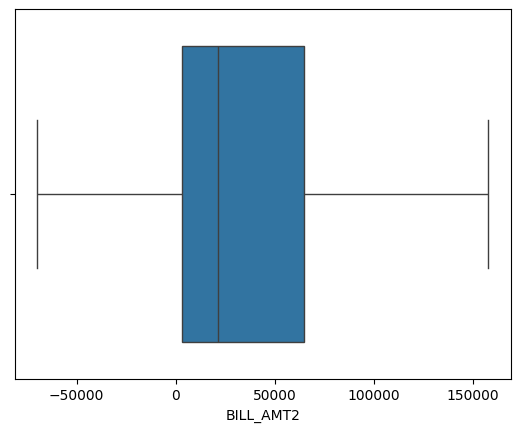

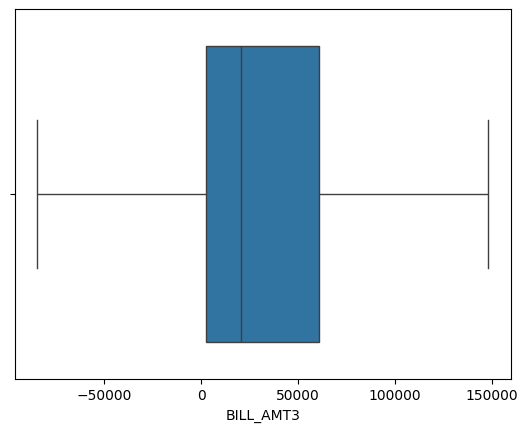

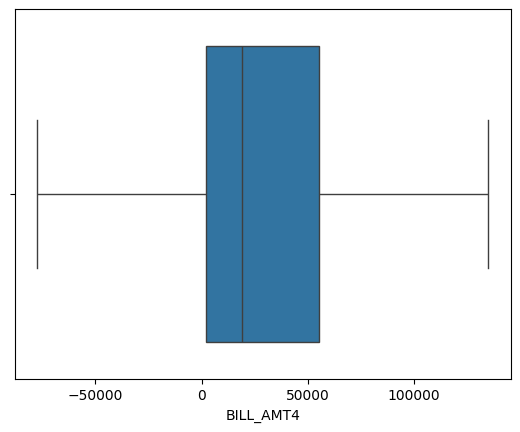

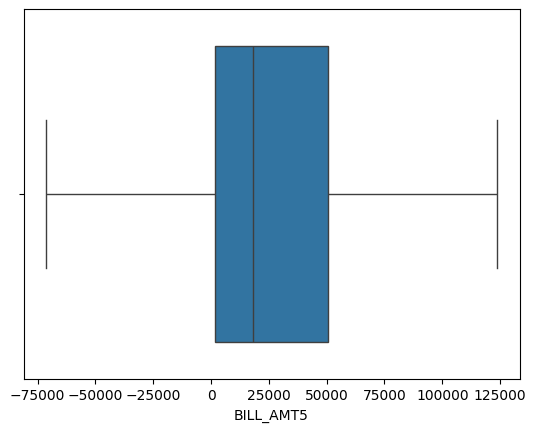

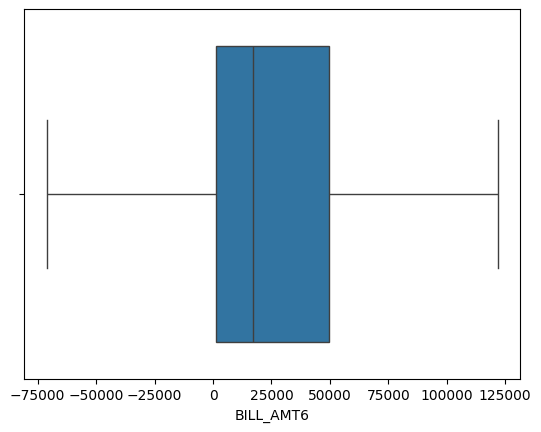

In [30]:
for b in bill:
  sns.boxplot(data=dados, x=b,)
  plt.show()

### 4.8 Identificando outliers em PAY_AMT

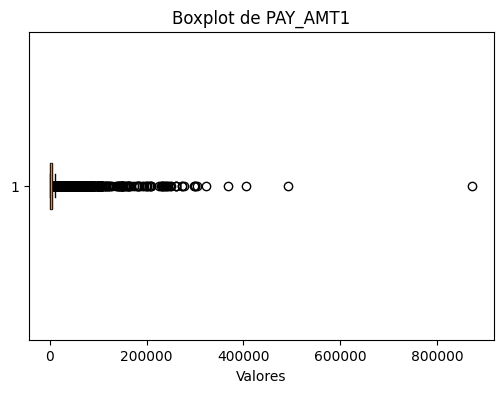

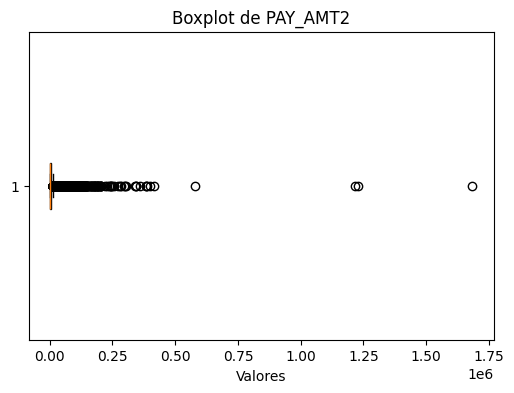

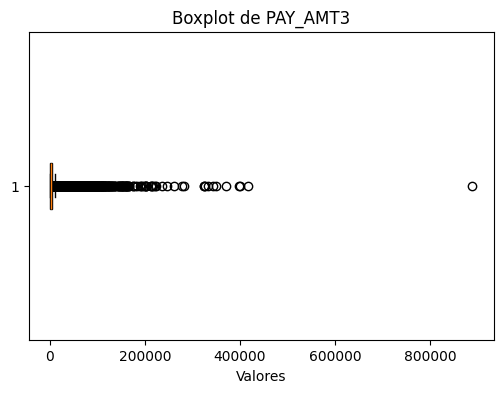

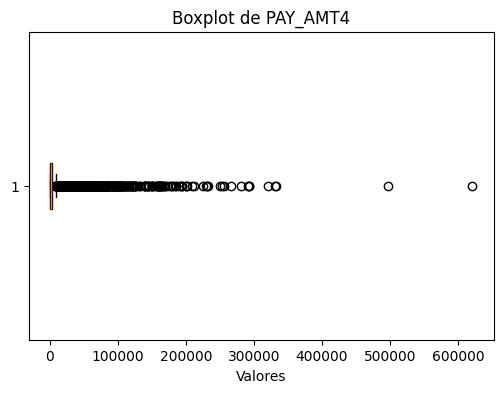

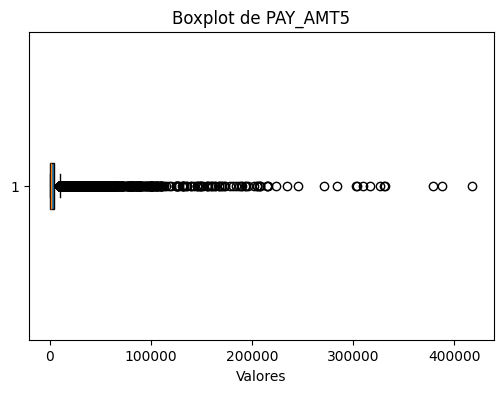

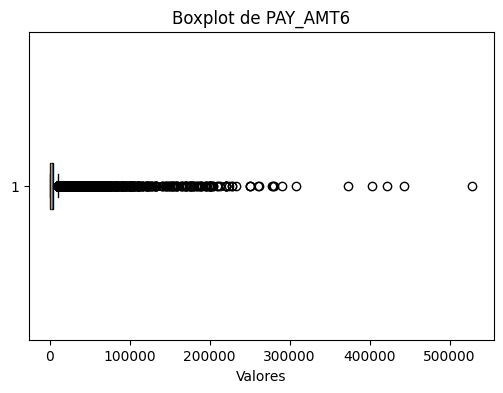

,Q1,Q3,IQR,Limite Inferior,Limite Superior,Qtd Outliers
PAY_AMT1,998.25,5023.25,4025.00,-5039.250,11060.750,1905.0
PAY_AMT2,836.00,5000.00,4164.00,-5410.000,11246.000,1903.0
PAY_AMT3,390.00,4500.00,4110.00,-5775.000,10665.000,1823.0
PAY_AMT4,284.00,4002.25,3718.25,-5293.375,9579.625,2054.0
PAY_AMT5,241.00,4051.00,3810.00,-5474.000,9766.000,2029.0
PAY_AMT6,102.00,4000.00,3898.00,-5745.000,9847.000,2063.0


In [31]:
resultados_pay_amt_outliers = verificar_outliers(dados, pay_amt)

pd.DataFrame(resultados_pay_amt_outliers).T

In [32]:
limites_pay_amt = {
    'PAY_AMT1': {'lower': -5039.250, 'upper': 11060.750},
    'PAY_AMT2': {'lower': -5410.000, 'upper': 11246.000},
    'PAY_AMT3': {'lower': -5775.000, 'upper': 10665.000},
    'PAY_AMT4': {'lower': -5293.375, 'upper': 9579.625},
    'PAY_AMT5': {'lower': -5474.000, 'upper': 9766.000},
    'PAY_AMT6': {'lower': -5745.000, 'upper': 9847.000},
}

# Capping
for col in pay_amt:
    lower_limit = limites_pay_amt[col]['lower']
    upper_limit = limites_pay_amt[col]['upper']
    # Substituindo valores acima do limite superior
    dados[col] = dados[col].apply(lambda x: upper_limit if x > upper_limit else x)
    # Substituindo valores abaixo do limite inferior
    dados[col] = dados[col].apply(lambda x: lower_limit if x < lower_limit else x)

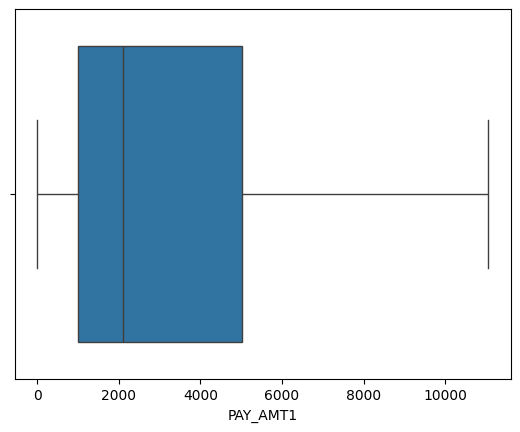

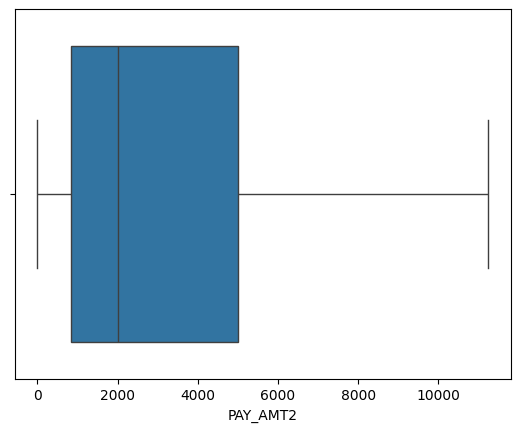

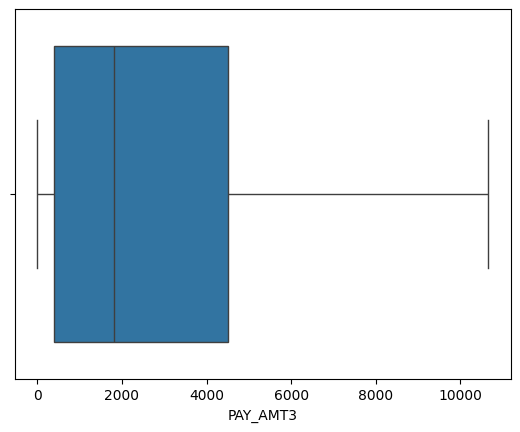

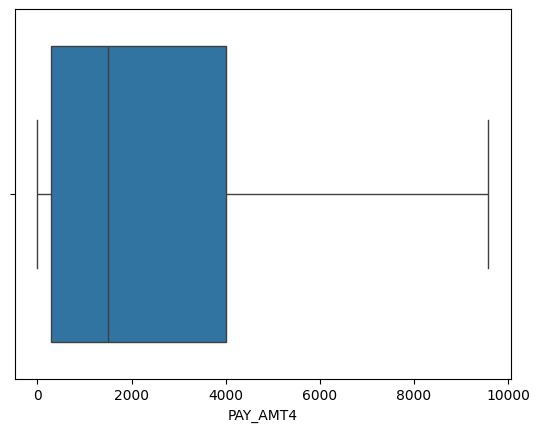

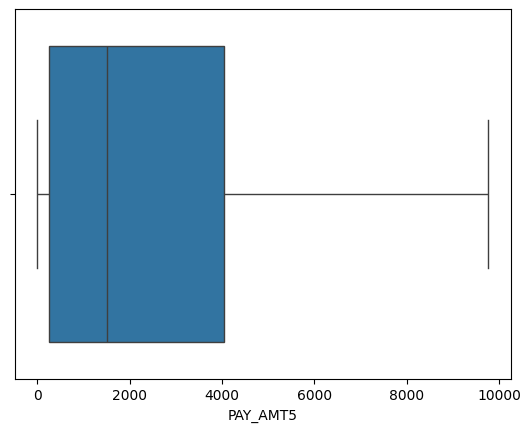

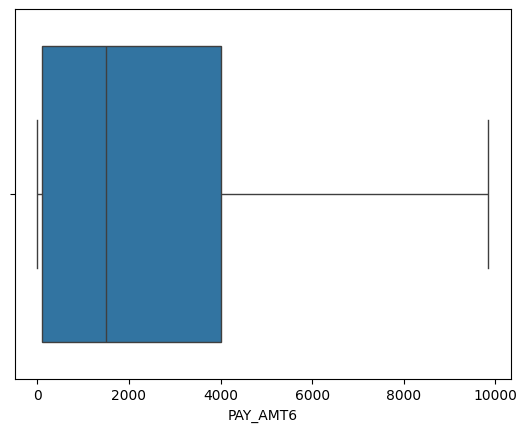

In [33]:
for p in pay_amt:
  sns.boxplot(data=dados, x=p)
  plt.show()

### 4.9 Identificando outliers em PAY

In [34]:
# Contar os valores únicos e suas frequências para cada PAY_X
for col in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    print(f"Valores únicos para {col}:\n{dados[col].value_counts()}\n")


Valores únicos para PAY_0:
PAY_0
 0    10324
-1     3937
 1     2608
-2     1923
 2     1883
 3      231
 4       47
 5       19
 8       11
 6        9
 7        8
Name: count, dtype: int64

Valores únicos para PAY_2:
PAY_2
 0    11043
-1     4174
 2     2776
-2     2643
 3      229
 4       69
 1       23
 5       21
 7       11
 6       10
 8        1
Name: count, dtype: int64

Valores únicos para PAY_3:
PAY_3
 0    11056
-1     4125
-2     2868
 2     2670
 3      173
 4       55
 7       22
 5       14
 6       13
 8        2
 1        2
Name: count, dtype: int64

Valores únicos para PAY_4:
PAY_4
 0    11542
-1     3949
-2     3047
 2     2208
 3      135
 4       51
 7       43
 5       19
 6        4
 8        2
Name: count, dtype: int64

Valores únicos para PAY_5:
PAY_5
 0    11852
-1     3840
-2     3193
 2     1869
 3      132
 4       53
 7       45
 5       13
 6        2
 8        1
Name: count, dtype: int64

Valores únicos para PAY_6:
PAY_6
 0    11450
-1     3970
-2     

Os dados estao dentros do esperado, sem a presenca de outliers.

## 5. Preparando as Variaveis Categoricas

### 5.1 Variaveis nominais

* SEX
* MARRIAGE

EDUCATION sera usada com ordinal, assim como ja esta. Ja SEX e MARRIAGE serao transformados usando dummies pois os valores nestas categorias nao possui hierarquia.

In [35]:
cat_nominais = ['SEX','MARRIAGE']

dados_one_hot = pd.get_dummies(dados, columns=cat_nominais, drop_first=True)
dados_one_hot.columns

Index(['ID', 'LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month', 'LIMIT_BAL_CAPPED', 'SEX_2', 'MARRIAGE_2',
       'MARRIAGE_3'],
      dtype='object')

## Modelo base

Apenas usando o valor majoritario teriamos uma precisao de 77.880%, logo qualquer modelo abaixo ou de valor parecido nao vale o custo de criar-lo

In [36]:
total = 20000
calote = dados['default_payment_next_month'].value_counts()[1]
honesto = dados['default_payment_next_month'].value_counts()[0]
pct_calote = (100 * 4645) / 21000
pct_honesto = (100 * 16355) / 21000
print(f"% de calote base: {pct_calote}%")
print(f"% de honesto base: {pct_honesto}%")

% de calote base: 22.11904761904762%
% de honesto base: 77.88095238095238%
